# Предсказание оттока пользователей, данные с Kaggle.

Проведем EDA.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
# загрузим датасет
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [18]:
# разделим колонки на категориальные и числовые
num = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

cat = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

X = num + cat
y = 'Churn'

test.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [19]:
# Проверим наличие пропущенных значений
print("Количество пропущенных значений:")
print(train.isnull().sum())
print(test.isnull().sum())

Количество пропущенных значений:
ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64
ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup         

In [20]:
# Проверим и удалим дубликаты, если они есть
print(f"Дубликаты в train: {train.duplicated(keep=False).sum()}")
print(f"Дубликаты в test: {test.duplicated(keep=False).sum()}")

Дубликаты в train: 28
Дубликаты в test: 6


In [21]:
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)
print(f"Дубликаты в train: {train.duplicated(keep=False).sum()}")
print(f"Дубликаты в test: {test.duplicated(keep=False).sum()}")

Дубликаты в train: 0
Дубликаты в test: 0


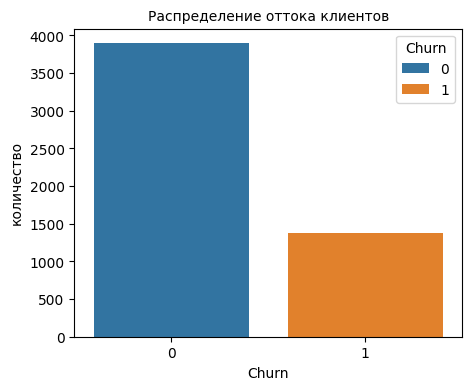

In [25]:
# построим график оттока пользователей
train[y].value_counts()
class_counts = train[y].value_counts()

plt.figure(figsize=(5, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index)
plt.title(f'Распределение оттока клиентов', fontsize=10)
plt.xlabel(f'{y}', fontsize=10)
plt.ylabel('количество', fontsize=10)
plt.show()

In [26]:
train[num].info()
test[num].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5268 entries, 0 to 5281
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientPeriod     5268 non-null   int64  
 1   MonthlySpending  5268 non-null   float64
 2   TotalSpent       5268 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 164.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1758 entries, 0 to 1760
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientPeriod     1758 non-null   int64  
 1   MonthlySpending  1758 non-null   float64
 2   TotalSpent       1758 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 54.9+ KB


In [27]:
# поменяем тип TotalSpent
train['TotalSpent'] = train['TotalSpent'].replace(' ', None)
test['TotalSpent'] = test['TotalSpent'].replace(' ', None)
train['TotalSpent'] = train['TotalSpent'].astype(float)
test['TotalSpent'] = test['TotalSpent'].astype(float)
train[train['TotalSpent'].isna()]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,NaN,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [28]:
# заменим пустые значения нулями
train['TotalSpent'].fillna(0, inplace=True)
test['TotalSpent'].fillna(0, inplace=True)

train[num].describe()

,ClientPeriod,MonthlySpending,TotalSpent
count,5268.000000,5268.000000,5268.000000
mean,32.480448,64.977563,2293.445549
std,24.529439,30.176025,2269.111393
min,0.000000,18.250000,0.000000
25%,9.000000,35.537500,401.925000
50%,29.000000,70.450000,1411.500000
75%,55.000000,90.050000,3808.637500
max,72.000000,118.750000,8684.800000


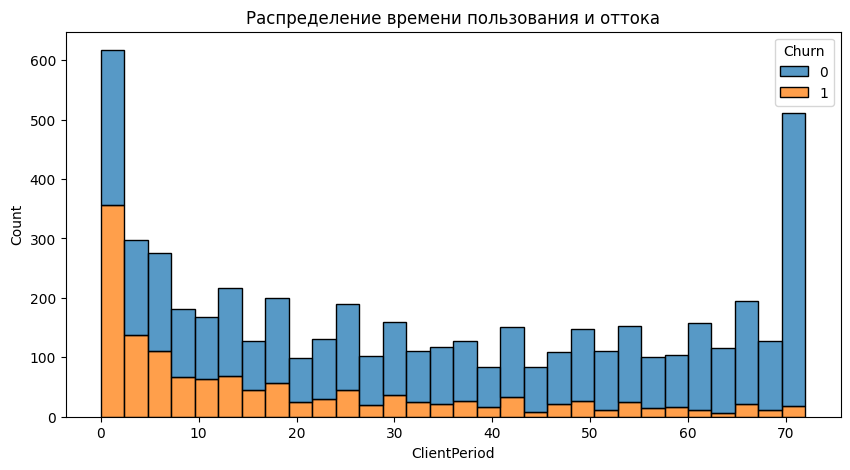

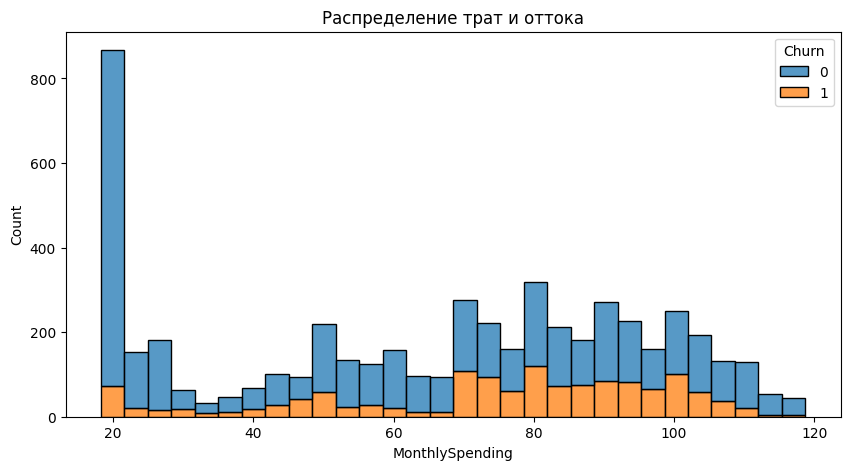

In [30]:
# постороим графики зависимостей
plt.figure(figsize=(10, 5))
sns.histplot(data=train, x='ClientPeriod', hue='Churn', multiple='stack', bins=30)
plt.title('Распределение времени пользования и оттока')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=train, x='MonthlySpending', hue='Churn', multiple='stack', bins=30)
plt.title('Распределение трат и оттока')
plt.show()

In [31]:
train[cat].head()

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


In [32]:
train[cat].info()
test[cat].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5268 entries, 0 to 5281
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sex                       5268 non-null   object
 1   IsSeniorCitizen           5268 non-null   int64 
 2   HasPartner                5268 non-null   object
 3   HasChild                  5268 non-null   object
 4   HasPhoneService           5268 non-null   object
 5   HasMultiplePhoneNumbers   5268 non-null   object
 6   HasInternetService        5268 non-null   object
 7   HasOnlineSecurityService  5268 non-null   object
 8   HasOnlineBackup           5268 non-null   object
 9   HasDeviceProtection       5268 non-null   object
 10  HasTechSupportAccess      5268 non-null   object
 11  HasOnlineTV               5268 non-null   object
 12  HasMovieSubscription      5268 non-null   object
 13  HasContractPhone          5268 non-null   object
 14  IsBillingPaperless        526

In [54]:
print(train['Sex'].value_counts(dropna=False))
print(test['Sex'].value_counts(dropna=False))

Sex
Male      2647
Female    2621
Name: count, dtype: int64
Sex
Male      899
Female    859
Name: count, dtype: int64


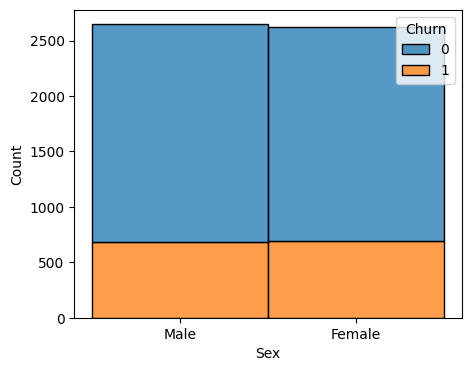

In [55]:
plt.figure(figsize=(5, 4))
sns.histplot(data=train, x='Sex', hue='Churn', multiple='stack', bins=30)
plt.show()

In [56]:
print(train['IsSeniorCitizen'].value_counts(dropna=False))
print(test['IsSeniorCitizen'].value_counts(dropna=False))

IsSeniorCitizen
0    4427
1     841
Name: count, dtype: int64
IsSeniorCitizen
0    1458
1     300
Name: count, dtype: int64


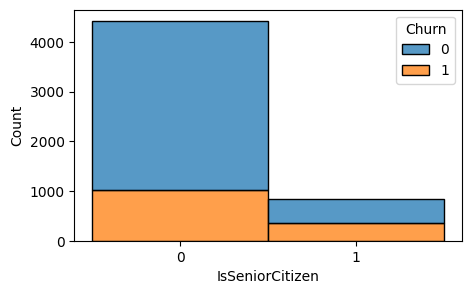

In [58]:
train['IsSeniorCitizen'] = train['IsSeniorCitizen'].astype('category')
test['IsSeniorCitizen'] = test['IsSeniorCitizen'].astype('category')
plt.figure(figsize=(5, 3))
sns.histplot(data=train, x='IsSeniorCitizen', hue='Churn', multiple='stack')
plt.xticks(ticks=[0, 1])
plt.show()

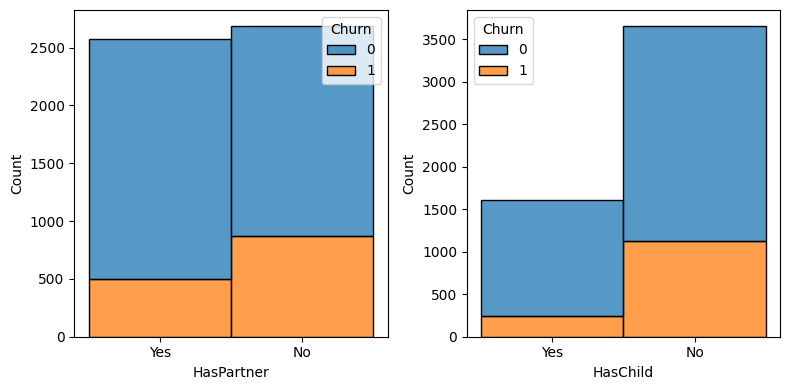

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

sns.histplot(data=train, x='HasPartner', hue='Churn', multiple='stack', ax=axes[0])
sns.histplot(data=train, x='HasChild', hue='Churn', multiple='stack', ax=axes[1])
plt.tight_layout()

plt.show()

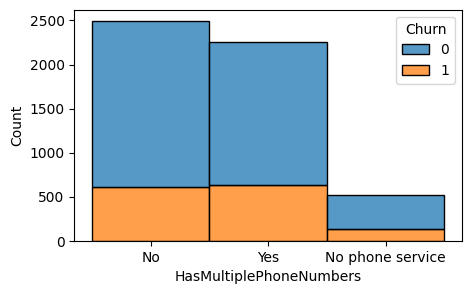

In [60]:
plt.figure(figsize=(5, 3))
sns.histplot(data=train, x='HasMultiplePhoneNumbers', hue='Churn', multiple='stack')
plt.show()

In [61]:
print(train['HasInternetService'].value_counts(dropna=False))
print(train['HasOnlineSecurityService'].value_counts(dropna=False))
print(train['HasOnlineBackup'].value_counts(dropna=False))

HasInternetService
Fiber optic    2335
DSL            1798
No             1135
Name: count, dtype: int64
HasOnlineSecurityService
No                     2604
Yes                    1529
No internet service    1135
Name: count, dtype: int64
HasOnlineBackup
No                     2324
Yes                    1809
No internet service    1135
Name: count, dtype: int64


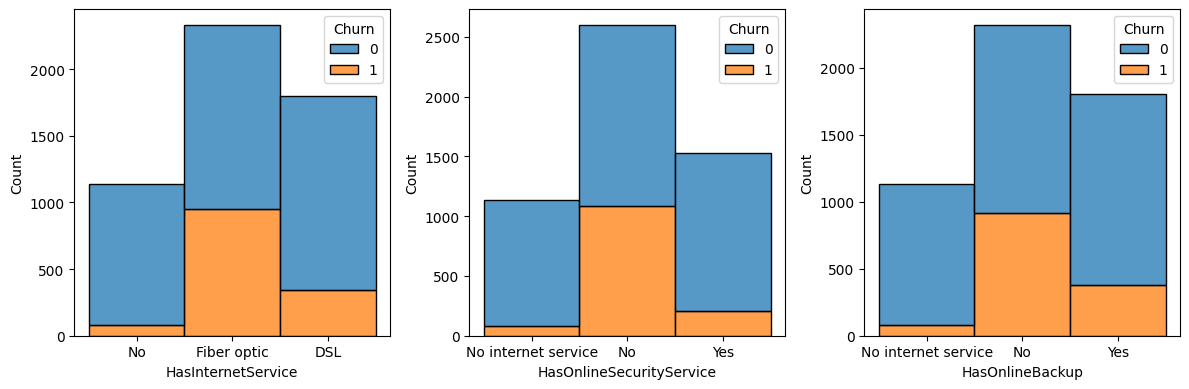

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sns.histplot(data=train, x='HasInternetService', hue='Churn', multiple='stack', ax=axes[0])
sns.histplot(data=train, x='HasOnlineSecurityService', hue='Churn', multiple='stack', ax=axes[1])
sns.histplot(data=train, x='HasOnlineBackup', hue='Churn', multiple='stack', ax=axes[2])
plt.tight_layout()

plt.show()

In [63]:
print(train['HasDeviceProtection'].value_counts(dropna=False))
print(test['HasDeviceProtection'].value_counts(dropna=False))
print(train['HasTechSupportAccess'].value_counts(dropna=False))
print(test['HasTechSupportAccess'].value_counts(dropna=False))

HasDeviceProtection
No                     2309
Yes                    1824
No internet service    1135
Name: count, dtype: int64
HasDeviceProtection
No                     778
Yes                    598
No internet service    382
Name: count, dtype: int64
HasTechSupportAccess
No                     2596
Yes                    1537
No internet service    1135
Name: count, dtype: int64
HasTechSupportAccess
No                     869
Yes                    507
No internet service    382
Name: count, dtype: int64


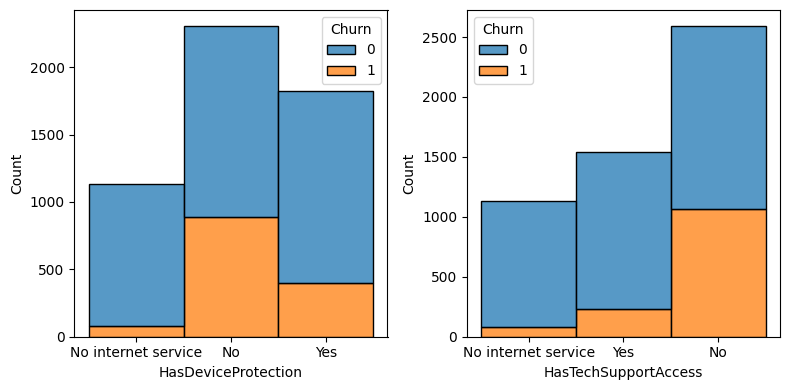

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

sns.histplot(data=train, x='HasDeviceProtection', hue='Churn', multiple='stack', ax=axes[0])
sns.histplot(data=train, x='HasTechSupportAccess', hue='Churn', multiple='stack', ax=axes[1])

plt.tight_layout()
plt.show()

In [65]:
print(train['HasOnlineTV'].value_counts(dropna=False))
print(train['HasMovieSubscription'].value_counts(dropna=False))


HasOnlineTV
No                     2091
Yes                    2042
No internet service    1135
Name: count, dtype: int64
HasMovieSubscription
No                     2073
Yes                    2060
No internet service    1135
Name: count, dtype: int64


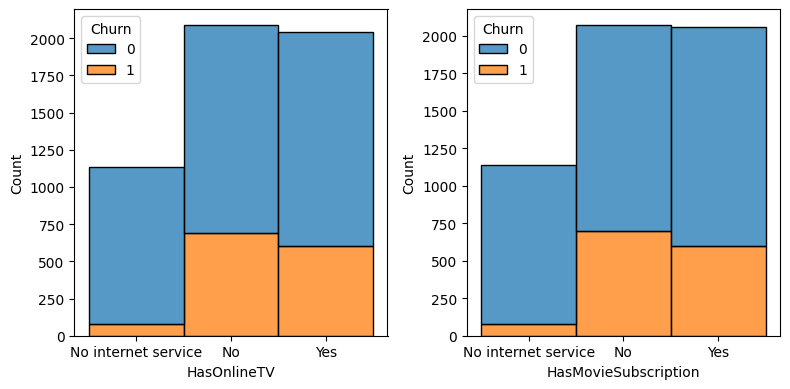

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

sns.histplot(data=train, x='HasOnlineTV', hue='Churn', multiple='stack', ax=axes[0])
sns.histplot(data=train, x='HasMovieSubscription', hue='Churn', multiple='stack', ax=axes[1])

plt.tight_layout()
plt.show()

In [68]:
train.columns

Index(['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'Sex',
       'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService',
       'HasMultiplePhoneNumbers', 'HasInternetService',
       'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection',
       'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription',
       'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod', 'Churn'],
      dtype='object')

In [69]:
print(train['HasContractPhone'].value_counts(dropna=False))
print(train['IsBillingPaperless'].value_counts(dropna=False))


HasContractPhone
Month-to-month    2906
Two year          1280
One year          1082
Name: count, dtype: int64
IsBillingPaperless
Yes    3140
No     2128
Name: count, dtype: int64


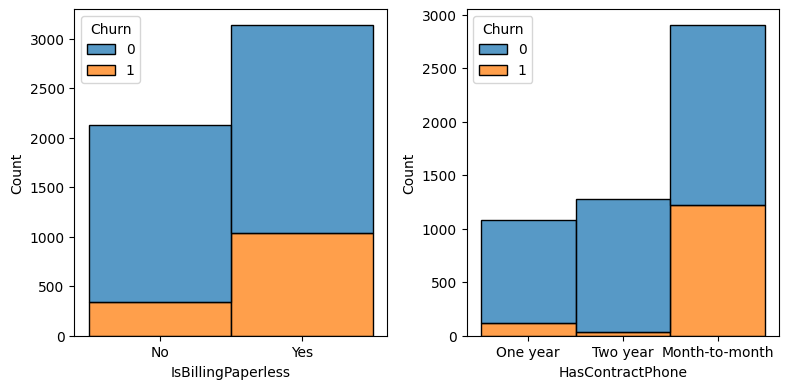

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

sns.histplot(data=train, x='IsBillingPaperless', hue='Churn', multiple='stack', ax=axes[0])
sns.histplot(data=train, x='HasContractPhone', hue='Churn', multiple='stack', ax=axes[1])

plt.tight_layout()
plt.show()

In [72]:
print(train['PaymentMethod'].value_counts(dropna=False))


PaymentMethod
Electronic check             1780
Mailed check                 1186
Bank transfer (automatic)    1159
Credit card (automatic)      1143
Name: count, dtype: int64


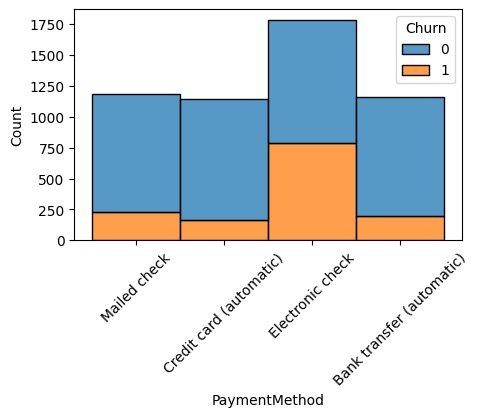

In [73]:
plt.figure(figsize=(5, 3))
sns.histplot(data=train, x='PaymentMethod', hue='Churn', multiple='stack')
plt.xticks(rotation=45)
plt.show()

interval columns not set, guessing: ['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'Churn']


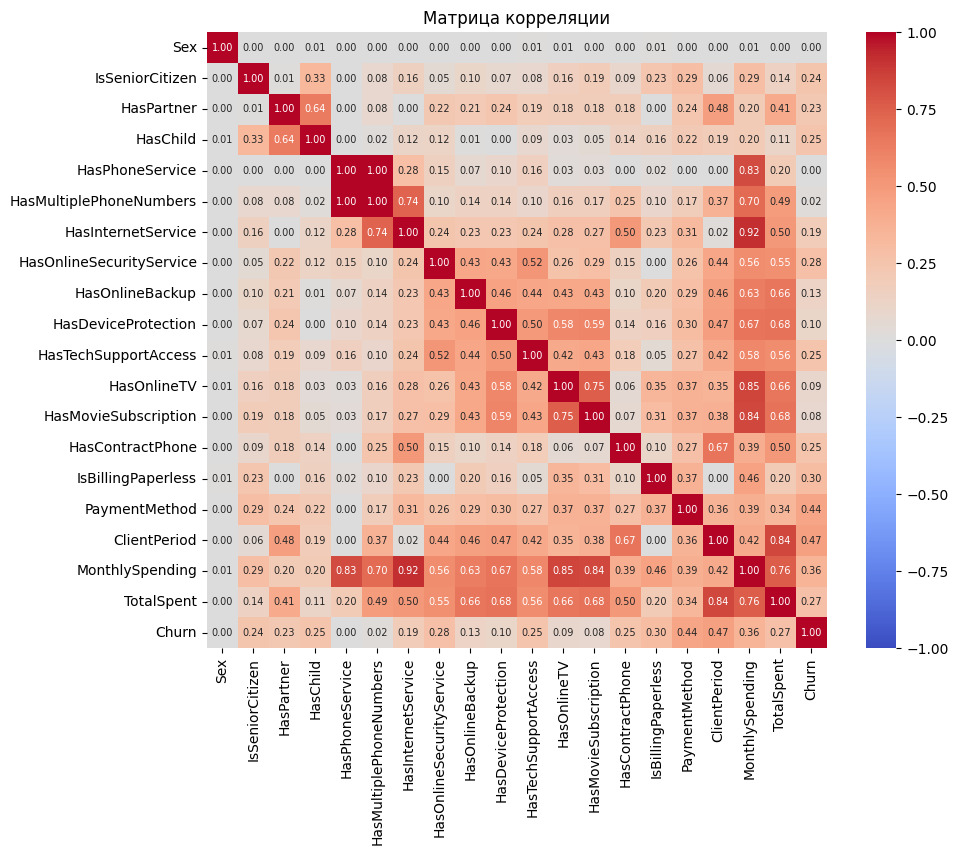

In [94]:
# Построим матрицу корреляции между признаками
!pip install phik

import phik

phik_corr = train[categorical + numerical + [y]].phik_matrix()

plt.figure(figsize=(10, 8))
sns.heatmap(
    phik_corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    vmin=-1,
    vmax=1,
    annot_kws={"size": 7}
)
plt.title('Матрица корреляции')
plt.show()


In [90]:
X = cat + num
columns_to_replace = [
    'HasOnlineSecurityService', 'HasOnlineBackup',
    'HasDeviceProtection', 'HasTechSupportAccess',
    'HasOnlineTV', 'HasMovieSubscription'
]

# Заменяем "No internet service" на "No"
for col in columns_to_replace:
    train[col] = train[col].replace('No internet service', 'No')
    test[col] = test[col].replace('No internet service', 'No')

train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No,No,No,No,No,No,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


Построим и обучим несколько моделей. С помощью сеточного поиска подберем параметры.

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix

X_train, X_valid, y_train, y_valid = train_test_split(train[X], train[y], test_size=0.2, random_state=42)

# Создаем трансформер для обработки данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num),  # Нормализация числовых признаков
        ('cat', OneHotEncoder(), cat)  # Кодирование категориальных признаков
    ]
)

# Создаем полный пайплайн
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegressionCV())
])

# Настройка сеточного поиска
param_grid = [{ 'classifier': [LogisticRegressionCV()],
                'classifier__Cs': [100, 10, 1, 0.1, 0.01, 0.001]},
              { 'classifier': [GradientBoostingClassifier(random_state=0)],
                'classifier__max_depth': [1, 2, 3]},
              { 'classifier': [MLPClassifier(random_state=0)]}
              ]

gs = GridSearchCV(estimator=pipeline,
                  param_grid=param_grid,
                  scoring='roc_auc',
                  n_jobs=-1,
                  cv=5,
                  verbose=1,
                  refit=True,
                  pre_dispatch='2*n_jobs')

# Запуск
gs.fit(X_train, y_train)
print('\n Best GS Estimator %s' % gs.best_estimator_)
print('\n Best GS Score %.4f' % gs.best_score_)
print('\n Best GS Params %s' % gs.best_params_)
print('\n Best score test %s' % gs.score(X_valid,y_valid))

# Оценка на тестовом наборе
y_pred_val = gs.predict(X_valid)
# Вычисляем ROC-AUC
print('\n Test ROC-AUC: %.4f' % (roc_auc_score(y_valid, y_pred_val)))
print('\n Confusion_matrix')
y_pred = (y_pred_val >= 0.5).astype(int)
print(confusion_matrix(y_valid, y_pred))

# Оценка на итоговом тестовом наборе
y_pred_val_test = gs.predict(test)


Fitting 5 folds for each of 10 candidates, totalling 50 fits

 Best GS Estimator Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ClientPeriod',
                                                   'MonthlySpending',
                                                   'TotalSpent']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'IsSeniorCitizen',
                                                   'HasPartner', 'HasChild',
                                                   'HasPhoneService',
                                                   'HasMultiplePhoneNumbers',
                                                   'HasInternetService',
                                                   'HasOnlineSecurityService',
                                                   'HasOnlineBackup',
         

Модель градиентного бустинга catboost.

In [101]:
!pip install catboost
from catboost import CatBoostClassifier

X_train, X_valid, y_train, y_valid = train_test_split(train[X], train[y], test_size=0.2, random_state=42)

catboost = CatBoostClassifier(cat_features=categorical, eval_metric='AUC', random_state=42, verbose=300)

catboost.fit(X_train, y_train, eval_set=(X_valid, y_valid))

# Получаем вероятности для ROC-AUC
y_pred_cat = catboost.predict_proba(X_valid)[:, 1]

# Вычисляем ROC-AUC
print('\n Test ROC-AUC: %.4f' % (roc_auc_score(y_valid, y_pred_cat)))
print('\n Confusion_matrix')
y_pred = (y_pred_cat >= 0.5).astype(int)
print(confusion_matrix(y_valid, y_pred))

Learning rate set to 0.045207
0:	test: 0.8150939	best: 0.8150939 (0)	total: 11.4ms	remaining: 11.4s
300:	test: 0.8434877	best: 0.8456400 (141)	total: 2.66s	remaining: 6.18s
600:	test: 0.8383913	best: 0.8456400 (141)	total: 5.5s	remaining: 3.65s
900:	test: 0.8312992	best: 0.8456400 (141)	total: 8.84s	remaining: 971ms
999:	test: 0.8302680	best: 0.8456400 (141)	total: 10.5s	remaining: 0us

bestTest = 0.8456399939
bestIteration = 141

Shrink model to first 142 iterations.

 Test ROC-AUC: 0.8456

 Confusion_matrix
[[715  58]
 [144 137]]
